#Web-Scrapping Dataset

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from typing_extensions import Required
import requests
from bs4 import BeautifulSoup

def scrape_lyrics(url):
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        lyrics = [];
        tableBody = soup.find('table').tbody
        tableRows = tableBody.find_all('tr')
        #for row in tableRows:
        for row in tableRows:
          all_td = row.find_all('td')
          for tds in all_td:
            if(tds.find('a') == None):
              continue
            else:
              break
          link = tds.find('a')
          if(link == None):
            continue
          lyrics_url = "https://www.lyrics.com/" + link['href']
          #print(lyrics_url)
          lyrics_response = requests.get(lyrics_url, headers=headers)
          if response.status_code == 200:
            soup1 = BeautifulSoup(lyrics_response.content, 'html.parser')
            lyricsBodyText = soup1.find('div',class_="lyric clearfix").pre
            if(lyricsBodyText == None):
              continue
            #print(lyricsBodyText)
            lyrics.append(lyricsBodyText.text)
          else:
            print(f"Failed to fetch page. Status code: {response.status_code}")



        return lyrics;

    else:
        print(f"Failed to fetch page. Status code: {response.status_code}")




In [ ]:
all_lyrics = []
lyrics = scrape_lyrics("https://www.lyrics.com/album/3795603/100-Greatest-Breakfast-Songs")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

76


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3795714/100-Greatest-Acoustic-Songs")
all_lyrics.extend(lyrics)

In [ ]:
print(len(all_lyrics))

137


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3810248/100-Greatest-Summer-Songs")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

219


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3397581/100-Hits%3A-Summer-2016")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

271


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3355978/69-Hits-2016")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

314


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3802116/Afternoon-Songs")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

346


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3813824/Afternoon-Tunes")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

379


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3663801/55-Hits-Spring-2018")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

398


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3673470/Now-That%27s-What-I-Call-Music%2C-Vol.-66")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

416


In [ ]:
all_lyrics = list(set(all_lyrics))

In [ ]:
len(all_lyrics)

338

In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/2630902/Now-That%27s-What-I-Call-Music%21%2C-Vol.-83")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

378


In [ ]:
all_lyrics = list(set(all_lyrics))
len(all_lyrics)

378

In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3588085/Now-That%27s-What-I-Call-Music%21-95")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

392


In [ ]:
all_lyrics = list(set(all_lyrics))
len(all_lyrics)

391

In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/375684/Now-That%27s-What-I-Call-Music%21-Vol.-4")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

427


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3817347/Now-That%27s-What-I-Call-Music%21-70")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

444


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3522082/Now-That%27s-What-I-Call-Music%21-97")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

478


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3445426/Now-That%27s-What-I-Call-Music%21-61")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

495


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3407138/Latest-%26-Greatest-Party-Hits-%5B2016%5D")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

537


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3778125/Grammy-Nominees-2019")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

553


In [ ]:
lyrics = scrape_lyrics("https://www.lyrics.com/album/3699097/101-Hits%3A-Keep-on-Running")
all_lyrics.extend(lyrics)
print(len(all_lyrics))

628


In [ ]:
all_lyrics = list(set(all_lyrics))
len(all_lyrics)

614

#Data Cleansing

Removing Non-English Lyrics

In [ ]:
def is_english(text):
    # Skip empty or non-text lyrics
    if not text.strip():  # Handles empty or whitespace-only text
        return False
    return detect(text) == 'en'

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=c3a11dbd840b00761e7dac56178d79b66c400947e73a71df1995e3511086dfea
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langdetect import detect

In [ ]:
all_lyrics = [lyric for lyric in all_lyrics if is_english(lyric)]

In [ ]:
len(all_lyrics)

577

In [ ]:
print(all_lyrics[9])

Something must've gone wrong in my brain
Got your chemicals all in my veins
Feeling all the highs, feeling all the pain
Let go on the wheel, it’s the bullet lane
Now I'm seeing red, not thinking straight
Blurring all the lines, you intoxicate me

Just like nicotine, heroin, morphine
Suddenly, I'm a fiend and you're all I need
All I need, yeah, you're all I need

It's you, babe
And I'm a sucker for the way that you move, babe
And I could try to run, but it would be useless
You're to blame
Just one hit of you, I knew I'll never be the same
It's you, babe
And I'm a sucker for the way that you move, babe
And I could try to run, but it would be useless
You're to blame
Just one hit of you, I knew I'll never ever, ever be the same

I'll never be the same
I'll never be the same
I'll never be the same

Sneaking in L.A. when the lights are low
Off of one touch, I could overdose
You said, "stop playing it safe
Girl, I wanna see you lose control"

Just like nicotine, heroin, morphine
Suddenly, I'm

Dividing each lyric into 2 halves to reduce input size

In [ ]:
import re

def split_lyrics_flexibly(lyrics):

    verses = [verse.strip() for verse in re.split(r'\n\s*\n+', lyrics) if verse.strip()]

    mid = len(verses) // 2

    part1 = "\n\n".join(verses[:mid])
    part2 = "\n\n".join(verses[mid:])

    return part1, part2

In [ ]:
part1, part2 = split_lyrics_flexibly(all_lyrics[0])

print("Part 1:")
print(part1)
print("\n---\n")
print("Part 2:")
print(part2)

Part 1:
Written by lindsey buckingham and christine mcvie.
Oh...
Pretty baby
This feeling i just can't hide
You got me mystified

Oh...
Pretty darling
This feeling is deep inside
You got me mystified

The light that shines around you
It blinds my eyes
There's a magic surrounds you
Tell me where your secret lies

---

Part 2:
Oh...
Pretty darling
This feeling is deep inside
You got me mystified

Oh...
Pretty baby
This feeling i just can't hide
You got me mystified

You got me mystified
Mystified
Mystified
Mystified
Mystified


In [ ]:
splitted_lyrics = []
for lyrics in all_lyrics:
  part1, part2 = split_lyrics_flexibly(lyrics)
  splitted_lyrics.append(part1)
  splitted_lyrics.append(part2)

In [ ]:
print(len(splitted_lyrics))

1154


In [ ]:
print(splitted_lyrics[0])

Written by lindsey buckingham and christine mcvie.
Oh...
Pretty baby
This feeling i just can't hide
You got me mystified

Oh...
Pretty darling
This feeling is deep inside
You got me mystified

The light that shines around you
It blinds my eyes
There's a magic surrounds you
Tell me where your secret lies


In [ ]:
splitted_lyrics = list(set(splitted_lyrics))

In [ ]:
len(splitted_lyrics)

1142

In [ ]:
import json

In [ ]:
with open("lyrics.json", "w") as file:
    json.dump(splitted_lyrics, file, indent=4)

print("Lyrics saved to lyrics.json")

Lyrics saved to lyrics.json


In [ ]:
with open("lyrics.json", "r") as f:
    data = json.load(f)
data = [lyrics for lyrics in data if len(lyrics.strip().split())]

In [ ]:
print(len(data))

1141


In [ ]:
!pip install transformers

In [ ]:
from transformers import GPT2Tokenizer

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
tokenized_lengths = [len(tokenizer.encode(lyrics)) for lyrics in data]

Token indices sequence length is longer than the specified maximum sequence length for this model (1058 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
MAX_LENGTH = 1024

# Count sequences exceeding the max length
long_sequences = sum(len(tokenizer.encode(poem)) > MAX_LENGTH for poem in data)

print(f"Number of sequences longer than {MAX_LENGTH} tokens: {long_sequences}")


Number of sequences longer than 1024 tokens: 2


In [ ]:
MAX_LENGTH = 1024

# Remove sequences exceeding the max length
data = [poem for poem in data if len(tokenizer.encode(poem)) <= MAX_LENGTH]

print(f"Remaining sequences: {len(data)}")


Remaining sequences: 1139


In [ ]:
tokenized_lengths = [len(tokenizer.encode(lyrics)) for lyrics in data]

In [ ]:
tokenized_lengths = np.array(tokenized_lengths)

# Calculate percentiles and other statistics
median = np.percentile(tokenized_lengths, 50)  # 50th percentile (median)
percentile_95 = np.percentile(tokenized_lengths, 95)  # 95th percentile
percentile_99 = np.percentile(tokenized_lengths, 99)  # 99th percentile
percentile_10 = np.percentile(tokenized_lengths, 10)  # 99th percentile
mean = np.mean(tokenized_lengths)  # Mean length
std_dev = np.std(tokenized_lengths)  # Standard deviation

# Print the results
print(f"Median (50th percentile): {median}")
print(f"10th percentile: {percentile_10}")
print(f"95th percentile: {percentile_95}")
print(f"99th percentile: {percentile_99}")
print(f"Mean: {mean}")
print(f"Standard deviation: {std_dev}")

Median (50th percentile): 231.0
10th percentile: 128.0
95th percentile: 486.0999999999999
99th percentile: 598.4799999999996
Mean: 254.04302019315188
Standard deviation: 119.81174468018732


In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]','bos_token': '[BOS]','eos_token': '[EOS]'})

3

In [ ]:
encoded = tokenizer.encode(splitted_lyrics , padding = 'max_length' , truncation= True , max_length = 487)

In [ ]:
encoded = tokenizer(splitted_lyrics, padding = 'max_length', truncation = True , max_length = 487, return_tensors = 'pt')

In [ ]:
encoded

{'input_ids': tensor([[50257, 50257, 50257,  ..., 50257, 50257, 50257],
        [ 5377,     6,   261,  ..., 50257, 50257, 50257],
        [ 1212, 12199,    11,  ..., 50257, 50257, 50257],
        ...,
        [ 2396,   881,  1204,  ..., 50257, 50257, 50257],
        [ 1026,  1718,   514,  ..., 50257, 50257, 50257],
        [ 6214,   606,  6155,  ..., 50257, 50257, 50257]]), 'attention_mask': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
import torch

In [ ]:
second_lyrics_ids = encoded['input_ids'][1].tolist()  # Convert tensor to list

# Decode each token individually to see what it corresponds to
tokens_and_words = [(token_id, tokenizer.decode([token_id])) for token_id in second_lyrics_ids]

# Print each token and its decoded word
for token_id, word in tokens_and_words:
    print(f"Token ID: {token_id}, Word: '{word}'")

Token ID: 5377, Word: 'Com'
Token ID: 6, Word: '''
Token ID: 261, Word: 'on'
Token ID: 2576, Word: ' girl'
Token ID: 11, Word: ','
Token ID: 401, Word: ' com'
Token ID: 6, Word: '''
Token ID: 261, Word: 'on'
Token ID: 2576, Word: ' girl'
Token ID: 11, Word: ','
Token ID: 401, Word: ' com'
Token ID: 6, Word: '''
Token ID: 261, Word: 'on'
Token ID: 2576, Word: ' girl'
Token ID: 11, Word: ','
Token ID: 17207, Word: ' hey'
Token ID: 0, Word: '!'
'oken ID: 201, Word: '
Token ID: 198, Word: '
'
Token ID: 5377, Word: 'Com'
Token ID: 6, Word: '''
Token ID: 261, Word: 'on'
Token ID: 2576, Word: ' girl'
Token ID: 11, Word: ','
Token ID: 401, Word: ' com'
Token ID: 6, Word: '''
Token ID: 261, Word: 'on'
Token ID: 2576, Word: ' girl'
Token ID: 11, Word: ','
Token ID: 401, Word: ' com'
Token ID: 6, Word: '''
Token ID: 261, Word: 'on'
Token ID: 2576, Word: ' girl'
Token ID: 11, Word: ','
Token ID: 17207, Word: ' hey'
Token ID: 0, Word: '!'
Token ID: 198, Word: '
'
Token ID: 198, Word: '
'
Token ID: 

In [ ]:
print(tokenizer.decode(second_lyrics_ids, skip_special_tokens=True))

Com'on girl, com'on girl, com'on girl, hey!
Com'on girl, com'on girl, com'on girl, hey!

Baby Girl, you know that I just want to take you to the spot,
Do things to you that are definitely gonna get ya hot,
I love how ya shake that little booty around the club,
I just wanna turn you and me into an (us)
Homie wanna party but you know nobody else can (do)
We can do whatever, keep it public or if (you)
Wanna keep it private and undercover that's (cool) 
I just wanna stay under the covers with (you)

Now I know that you want it,
You've indicated,
It's obvious I need you,
Just make a decision,
'Bout what I gotta say,
Tell me what I gotta say,
Tell me what I gotta say,
To take you away with me,
To take you away with me,
To take you away with me,
To take you away with me,
To take you away,

Com'on girl, com'on girl, com'on girl, hey!
Com'on girl, com'on girl, com'on girl, hey!
Com'on girl, com'on girl, com'on girl, hey!
Com'on girl, com'on girl, com'on girl, hey!

I can see the look inside you

#EDA

Counting number of sub-words for each lyric

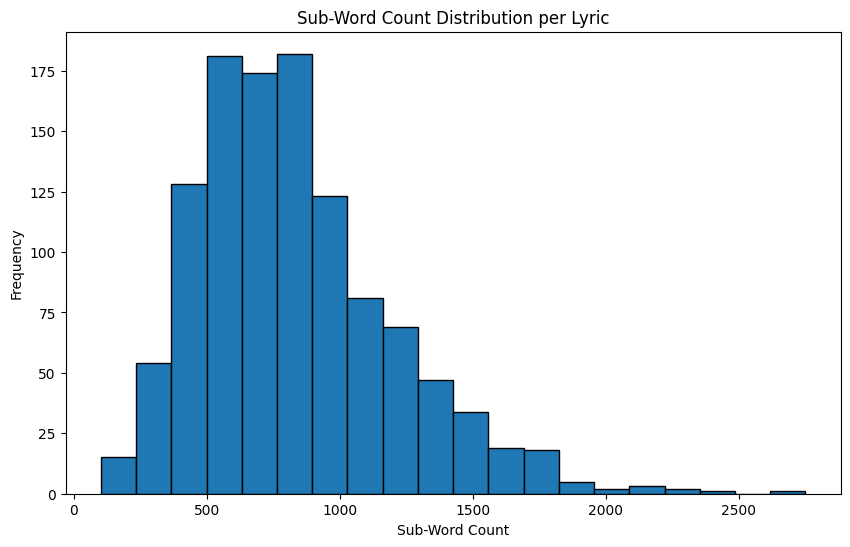

In [ ]:

word_counts = [len(lyric) for lyric in data]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, edgecolor='black')
plt.title('Sub-Word Count Distribution per Lyric')
plt.xlabel('Sub-Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from collections import Counter
import string

# Assuming `tokenized_lyrics_list` contains lists of token IDs
all_tokens = [token for lyric in encoded['input_ids'] for token in lyric]

# Decode token IDs, ignoring padding token (50257)
decoded_tokens = [
    tokenizer.decode([token]).strip()
    for token in all_tokens
    if token != 50257 and tokenizer.decode([token]).strip() not in {'\n', '\r'} and tokenizer.decode([token]).strip() not in string.punctuation
]

# Count word frequencies
word_counts = Counter(decoded_tokens)

# Most common words
most_common_words = word_counts.most_common(10)  # Get top 10 most common words
print("Most Common Words:", most_common_words)


Most Common Words: [('I', 10838), ('you', 7514), ('the', 5743), ('me', 3983), ('it', 3460), ('a', 3406), ('to', 3379), ("'t", 3218), ('in', 3048), ("'s", 2823)]


In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud

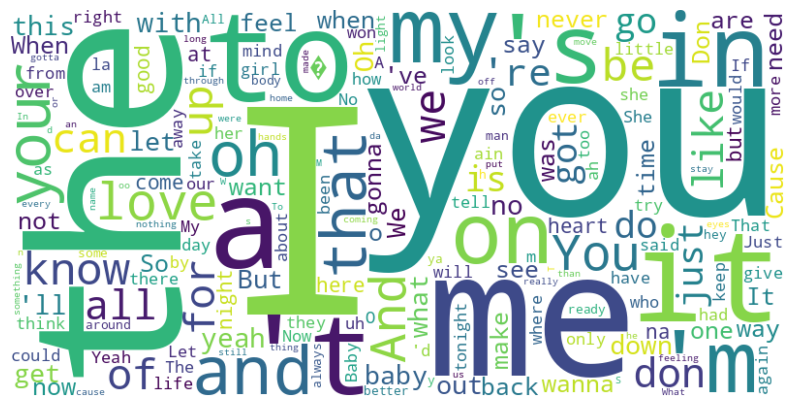

In [ ]:
# Create a word cloud using the filtered word counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config, AdamW, get_linear_schedule_with_warmup

In [ ]:
import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader, RandomSampler

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# Load model configuration
config = GPT2Config.from_pretrained("gpt2")

In [ ]:
# Create model instance and set embedding length
model = GPT2LMHeadModel.from_pretrained("gpt2", config=config)
model.resize_token_embeddings(len(tokenizer))

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(50260, 768)

In [ ]:
# Running the model on GPU
model = model.to(device)

In [ ]:
epochs = 4
batch_size = 8
warmup_steps = 1e2
sample_every = 100

In [ ]:
encoded

{'input_ids': tensor([[50257, 50257, 50257,  ..., 50257, 50257, 50257],
        [ 5377,     6,   261,  ..., 50257, 50257, 50257],
        [ 1212, 12199,    11,  ..., 50257, 50257, 50257],
        ...,
        [ 2396,   881,  1204,  ..., 50257, 50257, 50257],
        [ 1026,  1718,   514,  ..., 50257, 50257, 50257],
        [ 6214,   606,  6155,  ..., 50257, 50257, 50257]]), 'attention_mask': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encoded):
        # Filter samples where all values in attention_mask are not 0
        mask = (encoded["attention_mask"].sum(dim=1) > 0)  # Keep only rows with non-zero attention masks
        self.input_ids = encoded["input_ids"][mask]
        self.attention_mask = encoded["attention_mask"][mask]

    def __len__(self):
        # Return the total number of valid samples
        return self.input_ids.size(0)

    def __getitem__(self, idx):
        # Return a tuple of input_ids and attention_mask for the given index
        return self.input_ids[idx], self.attention_mask[idx]
dataset = CustomDataset(encoded)

In [ ]:
# Split data into train and validation sets
train_size = int(0.9*len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print("Number of samples for training =", train_size)
print("Number of samples for validation =", val_size)

Number of samples for training = 1026
Number of samples for validation = 115


In [ ]:
from torch.utils.data import SequentialSampler

In [ ]:
train_dataloader = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=batch_size)

val_dataloader = DataLoader(val_dataset,
                            sampler=SequentialSampler(val_dataset),
                            batch_size=batch_size)

In [ ]:
# Using AdamW optimizer with default parameters
optimizer = AdamW(model.parameters(), lr=5e-4, eps=1e-8)


# Toatl training steps is the number of data points times the number of epochs
total_training_steps = len(train_dataloader)*epochs


# Setting a variable learning rate using scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=warmup_steps,
                                            num_training_steps=total_training_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def format_time(elapsed):
  return str(datetime.timedelta(seconds=int(round(elapsed))))

In [ ]:
import datetime
import time
import random


In [ ]:
total_t0 = time.time()
training_stats = []
model = model.to(device)

In [ ]:
total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(epochs):
  print(f'Beginning epoch {epoch_i+1} of {epochs}')

  t0 = time.time()
  total_train_loss = 0
  model.train()

  # Labels are shifted by 1 timestep
  for step, batch in enumerate(train_dataloader):
    b_input_ids = batch[0].to(device)
    b_labels = batch[0].to(device)
    b_masks = batch[1].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    labels=b_labels,
                    attention_mask=b_masks)

    loss = outputs[0]

    batch_loss = loss.item()
    total_train_loss += batch_loss

    # Sampling every x steps
    if step != 0 and step % sample_every == 0:

      elapsed = format_time(time.time()-t0)
      print(f'Batch {step} of {len(train_dataloader)}. Loss: {batch_loss}. Time: {elapsed}')

      model.eval()

      sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,
                                    top_k=50,
                                    max_length = 200,
                                    top_p=0.95,
                                    num_return_sequences=1
                                )
      for i, sample_output in enumerate(sample_outputs):
        print(f'Example ouput: {tokenizer.decode(sample_output, skip_special_tokens=True)}')
      print()

      model.train()

    loss.backward()
    optimizer.step()
    scheduler.step()

  avg_train_loss = total_train_loss / len(train_dataloader)
  training_time = format_time(time.time()-t0)
  print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')
  print()

  t0 = time.time()
  model.eval()

  total_eval_loss = 0
  nb_eval_steps = 0

  for batch in val_dataloader:
    b_input_ids = batch[0].to(device)
    b_labels = batch[0].to(device)
    b_masks = batch[1].to(device)

    with torch.no_grad():

        outputs  = model(b_input_ids,
                         attention_mask = b_masks,
                         labels=b_labels)

        loss = outputs[0]

    batch_loss = loss.item()
    total_eval_loss += batch_loss

  avg_val_loss = total_eval_loss / len(val_dataloader)
  val_time = format_time(time.time() - t0)
  print(f'Validation loss: {avg_val_loss}. Validation Time: {val_time}')
  print()

  # Record all statistics from this epoch.
  training_stats.append(
      {
          'epoch': epoch_i + 1,
          'Training Loss': avg_train_loss,
          'Valid. Loss': avg_val_loss,
          'Training Time': training_time,
          'Validation Time': val_time
      }
  )
  print("------------------------------")

print(f'Total training took {format_time(time.time()-total_t0)}')

Beginning epoch 1 of 4


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Batch 100 of 129. Loss: 1.381316900253296. Time: 0:01:02
Example ouput:  Really that's just me
Maybe you'll be the one in my heart
It ain't so bad
Oh yeah, I need a little bit of your love

Maybe you'll be the one in my heart

I need a little bit of your love
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 
I need a little bit of your love 

Average Training Loss: 3.02007924447688. Epoch time: 0:01:21

Validation loss: 1.1316505750020345. Validation Time: 0:00:03

------------------------------
Beginning epoch 2 of 4


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 129. Loss: 0.9684083461761475. Time: 0:01:02
Example ouput:  Ice I had a dream and I had a dreamer
That I would go on with the girl and we're unstoppable (yeah we are unstoppable)
I always knew that this dream would go down in flames
One day I wake up from my sleep and I run

Yeah, I got you
We were just fucking on this dream
I made some plans for the night
We had to cut it down to the bone
And I said "I can't be gone"
So that's what we started doing (I'm just gonna be alright)
We started feeling good
But that's all that was left standing (we only had a good time)
So I go on with the girl and we're unstoppable (yeah we are unstoppable)
We started feeling good

Yeah, I got you
We were just fucking on this dream
I made some plans for the night
We had

Average Training Loss: 1.0717527376588925. Epoch time: 0:01:21

Validation loss: 1.078965965906779. Validation Time: 0:00:03

------------------------------
Beginning epoch 3 of 4


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 129. Loss: 1.082387924194336. Time: 0:01:02
Example ouput:  Lip, oh, oh, oh, oh, oh, oh
Oh, oh, oh, oh, oh, oh, oh, oh
Oh, oh, oh, oh, oh, oh, oh, oh

Ain't there a way that you can keep me going on so wild, oh oh, oh, oh
I am not afraid to let you go, oh oh, oh, oh, oh, oh, oh
I am not afraid to let you go, oh oh, oh, oh, oh, oh, oh, oh

Ain't there a way that you can keep me going on so wild, oh oh, oh, oh, oh
I am not afraid to let you go, oh oh, oh, oh, oh, oh, oh, oh

I am not afraid to let you go, oh oh, oh, oh, oh, oh, oh, oh


Average Training Loss: 0.9143670778865962. Epoch time: 0:01:21

Validation loss: 1.064310375849406. Validation Time: 0:00:03

------------------------------
Beginning epoch 4 of 4


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 129. Loss: 0.6734940409660339. Time: 0:01:02
Example ouput: nesium we don't need it for a cause
But we gotta keep on 'cause we feel strong
And love is free when you let me love you
When it feels right

I think the music's loud
And you wanna leave for the exit
Maybe I like it better
But the music's not right
So I'm gonna make a right turn
And leave you with the music

When you're with me
You know I like it better
But the music's not right
So I'm gonna make a right turn
And leave you with the music

When you're with me
You know I like it better
But the music's not right
So I'm gonna make a right turn
And leave you with the music

When you're with me
You know I like it better
But the music's not right
So I'm gonna

Average Training Loss: 0.7899654369021571. Epoch time: 0:01:21

Validation loss: 1.0722320516904196. Validation Time: 0:00:03

------------------------------
Total training took 0:05:33


In [ ]:
model.eval()

prompt = "king"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated,
                                do_sample=True,
                                top_k=50,
                                max_length = 200,
                                top_p=0.95,
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
  print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: king when I'm out and running
No one's ever gonna catch me
You better set me free, my freedom ain't no

I'll ride shotgun in the wind 'til the night is done

And when I'm gone
You're the one who made me who I am
And you're the one who set me free
Free. No one's ever gonna catch me
No one's ever gonna catch me
So I take my wheel off
And I ride shotgun in the wind 'til the night is done

If I get tired of all the things I like about you
You're the one who made me who I am
And you're the one who set me free
Free. I don't ever want to see another
No one's ever gonna catch me
You're the one who made me who I am
So I take my wheel off
And I ride shotgun in the wind 'til the night is done



1: king is a man, he's the product of his environment
He's born to rule but he's vain and vain, and it's clear that his soul is incomplete
And if all is lost and nothing remains
Then the man who made him a king will rise again

There's something in all of us who seek power
There's something in all of u

In [ ]:
import torch
import os

# Specify the directory where the model will be saved
output_dir = "/kaggle/working/model"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Check if model uses DataParallel and save the correct model
model_to_save = model.module if hasattr(model, 'module') else model

# Save the trained model, configuration, and tokenizer
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f'Model and tokenizer saved to {output_dir}')

# Zip the saved model directory for download
!zip -r model.zip /kaggle/working/model
print("Model zipped and ready for download.")


Model and tokenizer saved to /kaggle/working/model
  adding: kaggle/working/model/ (stored 0%)
  adding: kaggle/working/model/model.safetensors (deflated 7%)
  adding: kaggle/working/model/special_tokens_map.json (deflated 75%)
  adding: kaggle/working/model/config.json (deflated 51%)
  adding: kaggle/working/model/merges.txt (deflated 53%)
  adding: kaggle/working/model/generation_config.json (deflated 24%)
  adding: kaggle/working/model/vocab.json (deflated 68%)
  adding: kaggle/working/model/tokenizer_config.json (deflated 72%)
  adding: kaggle/working/model/added_tokens.json (deflated 35%)
Model zipped and ready for download.
